In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

# Stackoverflow survey response data

In [2]:
so_survey_df = pd.read_csv('./Combined_DS_v10.csv')
print(so_survey_df.shape)
so_survey_df.head()

(999, 11)


,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


## What does your data look like?

In [3]:
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]
so_numeric_df.head()

,ConvertedSalary,Age,Years Experience
0,NaN,21,13
1,70841.0,38,9
2,NaN,45,11
3,21426.0,46,12
4,41671.0,39,7


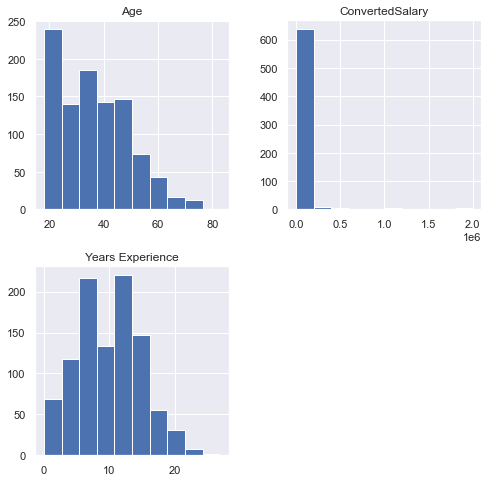

In [6]:
# create a histogram
so_numeric_df.hist(figsize=(8, 8))
plt.show()

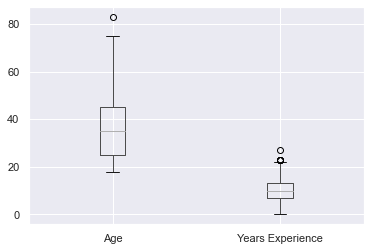

In [7]:
# create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

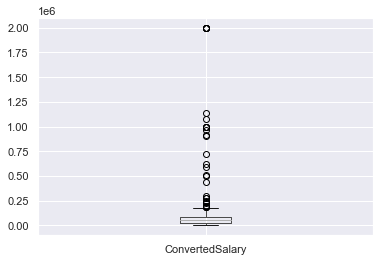

In [9]:
# create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

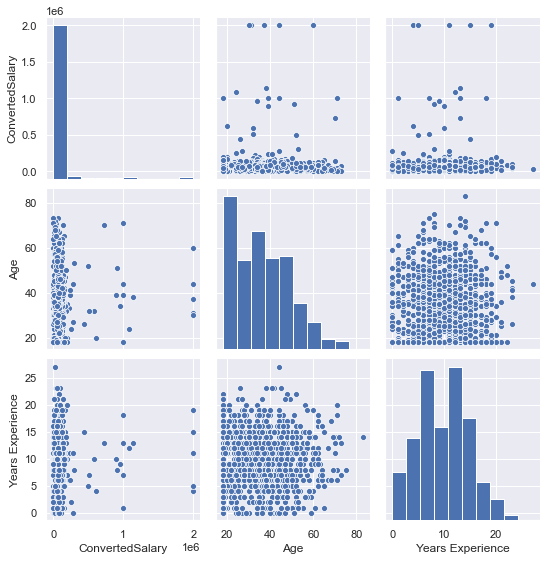

In [10]:
# plot pairwise relationships
sns.pairplot(so_numeric_df)
plt.show()

In [11]:
# summary stats
so_numeric_df.describe()

,ConvertedSalary,Age,Years Experience
count,6.650000e+02,999.000000,999.000000
mean,9.256517e+04,36.003003,9.961962
std,2.091344e+05,13.255127,4.878129
min,0.000000e+00,18.000000,0.000000
25%,2.755000e+04,25.000000,7.000000
50%,5.556200e+04,35.000000,10.000000
75%,8.823800e+04,45.000000,13.000000
max,2.000000e+06,83.000000,27.000000


## Normalization

In [15]:
# instantiate a MinMaxScaler
MM_scaler = MinMaxScaler()

# fit to age
MM_scaler.fit(so_numeric_df[['Age']])

# transform data
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# compare
so_numeric_df[['Age_MM', 'Age']].head()

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age_MM,Age
0,0.046154,21
1,0.307692,38
2,0.415385,45
3,0.430769,46
4,0.323077,39


## Standardization

In [16]:
# instantiate a StandardScaler
SS_scaler = StandardScaler()

# fit and transform
so_numeric_df['Age_SS'] = SS_scaler.fit_transform(so_numeric_df[['Age']])

# compare
so_numeric_df[['Age_SS', 'Age']].head()

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Age_SS,Age
0,-1.132431,21
1,0.150734,38
2,0.679096,45
3,0.754576,46
4,0.226214,39


## Log transformation

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


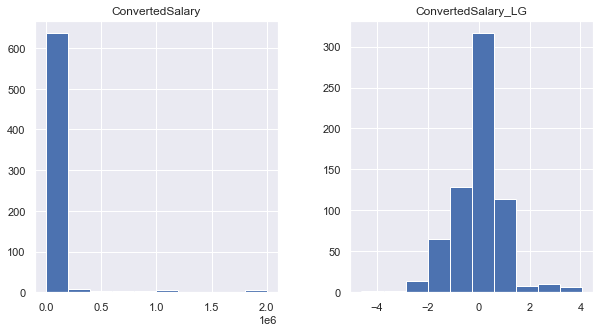

In [18]:
# instantiate a power transformer
pow_trans = PowerTransformer()

# fit and transform
so_numeric_df['ConvertedSalary_LG'] = pow_trans.fit_transform(
    so_numeric_df[['ConvertedSalary']])

# plot the data before and after transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist(figsize=(10, 5))
plt.show()

## Percentage based outlier removal

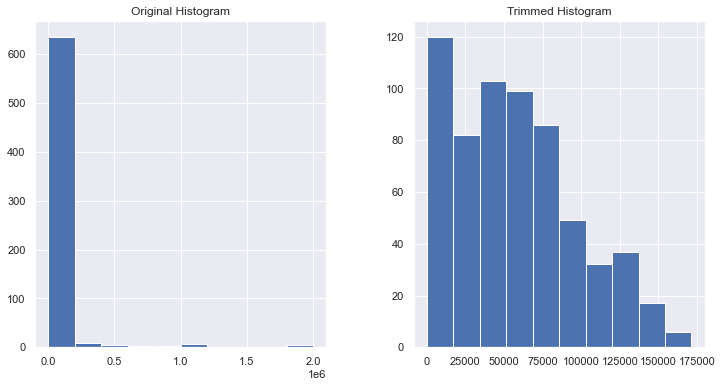

In [21]:
# find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(12, 6))

so_numeric_df[['ConvertedSalary']].hist(ax=ax1)
trimmed_df[['ConvertedSalary']].hist(ax=ax2)
ax1.set(title='Original Histogram')
ax2.set(title='Trimmed Histogram')

plt.show()

## Statistical outlier removal

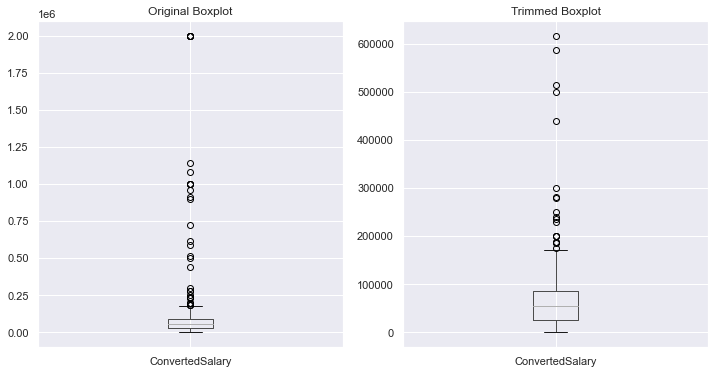

In [25]:
# find the mean at st dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# calculate the cut-off
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# trim
trimmed_df = so_numeric_df[
    (so_numeric_df['ConvertedSalary'] < upper) &
    (so_numeric_df['ConvertedSalary'] > lower)
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

so_numeric_df[['ConvertedSalary']].boxplot(ax=ax1)
trimmed_df[['ConvertedSalary']].boxplot(ax=ax2)
ax1.set(title='Original Boxplot')
ax2.set(title='Trimmed Boxplot')

plt.show()

## Train and testing transformations

In [33]:
so_numeric_df = so_numeric_df[['ConvertedSalary', 'Age', 'Years Experience']]

In [34]:
so_train_numeric, so_test_numeric = train_test_split(so_numeric_df,
                                                     test_size=299,
                                                     random_state=42)

In [39]:
# apply a standard scaler to Age of training data
SS_scaler = StandardScaler()
SS_scaler.fit(so_train_numeric[['Age']])

# transform test data using the fitted scaler
so_test_numeric['Age_SS'] = SS_scaler.transform(so_test_numeric[['Age']])
so_test_numeric[['Age', 'Age_SS']].head()

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Age_SS
453,29,-0.527627
793,25,-0.833244
209,46,0.771247
309,18,-1.368075
740,26,-0.756840


In [40]:
# removing outliers using the training set
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# trim the test set
trimmed_test = so_test_numeric[
    (so_test_numeric['ConvertedSalary'] < train_upper) &
    (so_test_numeric['ConvertedSalary'] > train_lower)
]